<a href="https://colab.research.google.com/github/skillnerve/DataScience-Projects/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time-series forecasting of Bitcoin prices using high-dimensional
features: a machine learning approach

Introduction:

- Bitcoin is a decentralized cryptocurrency, which is a type of digital asset that provides the basis for peer-to-peer financial
transactions based on blockchain technology.

- One of the main problems with decentralized cryptocurrencies is price
volatility, which indicates the need for studying the underlying price model. Moreover, Bitcoin prices exhibit non-stationary behavior, where the statistical distribution of data changes over time.

- Due to rapid digitalisation of asserts and development of new technologies like blockchain the price of Bitcoin increasing. While statments from twitter about their acceptance and rejection also influences the price of Bitcoin. There are many such factors which influence the price of Bitcoin in the market. In this price prediction task we will go through various features and technical indicators such as variance, mean in determining the price of Bitcoin.

- We will try to predict Bitcoin Price:
        - End of Day
        - Short-term (7 days)
        - Mid-term (30 and 90 days)

- We will also try to classify Increase/ Decrease in BitCoin Price:
        - End of Day
        - Short-term (7 days)
        - Mid-term (30 and 90 days)

Index of Content
- Data
- Approach
- Exploratory Data Analysis
- Feature Engineering
- Machine Learning Models

Data:

Data has been taken from https://github.com/heliphix/btc_data/blob/main/btc_data.csv which was extracted from
https://bitinfocharts.com.
The data has a total of 736 features and 3488 rows.These Features can be classified as 
  - Raw
  - Technical Indicators

Raw consists of 
  - **Transactions**: The number of sent and received Bitcoin payments
  - **Block size**:   Transactional information cryptographically linked in the blockchain.
  - **Sent from addresses**: These are number of distinct Bitcoin addresses from which payments are made everyday.
  - **Difficulty**: The daily average mining difficulty.
  - **Average transaction value**: The average value of the transactions in Bitcoin.
  - **Mining profitability**: The profitability in USD/day for 1 terahash per second.
  - **Sent BTC**: The total Bitcoins sent daily.
  - **Fee-to reward ratio**: The ratio of the fee sent in a transaction to the reward for verifying that transaction by the other users.
  - **Median transaction fee**: The median of transaction fees in Bitcoin.
  - **Average transaction fee**: Each transaction can have an associated transaction fee determined by the sender. The transaction fee is received by the miners who verify the transaction. Transactions with higher fees incentivize the Bitcoin miners to process them sooner than transactions with lower fees.
  - **Block time**: The time required to mine one block.
  - **Hashrate**: The daily total computational capacity of the Bitcoin
network. Hashrate indicates the speed of a computer in completing an operation.
  - **Median transaction value**: The median value of the transactions in Bitcoin.
  - **Active addresses**: The number of unique addresses participating in a transaction by either sending or receiving Bitcoins.
  -  **Top 100 to total**: The ratio of Bitcoins stored in the top 100 accounts to all the other accounts of Bitcoin.

Technical Indicators consists of (these are extracted from raw data)
  - **Simple Moving Average (SMA)**: simple moving average (SMA) is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.
  - **Exponential Moving Average(EMA)**: An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.
  - **Relative Strength Index (RSI)**: The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
  - **Weighted Moving Average (WMA)**:  weighted moving average (WMA) is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.
  - **Standard Deviation (STD)**: standard deviation is a measure of the amount of variation
  - **Variance (VAR)**: variance measures variability from the average or mean.
  - **Triple Moving Exponential (TRIX)**: The triple exponential moving average (TEMA) is one that responds more quickly to near-term price changes than a normal exponential moving average.
  - **Rate of Change (ROC)**: Rate of change is used to mathematically describe the percentage change in value over a defined period of time

Approach:

- Check if the Data is missing, if found missing use linear interpolation to fill the values.
- Verify whether Data is stationary or non stationary.
- Scaling Data Features

------------------------------------------------------------------------------------------------------------------------------------------------

*Approach 1*

- First we shall work on removing constant and quasi static features
- Feature importance will be determined using Random Forest,then reduced features are checked for coorelation using Pearson correlation.

*Approach 2*

- Using PCA to get uncorrelated featues without manually removing features
------------------------------------------------------------------------------------------------------------------------------------------------

- After Data is ready for work, EDA will be done on the data.
- Shuffle the data and split the training data into 60% and 20% for regression cases and predict for rest 20%. While for classification split the data into 60%, 20%, 20% based on time.
- Machine Learning models will be implemented 
- Root mean squared error (RMSE),Mean absolute error (MAE), Mean
absolute percentage error (MAPE) will checked as metrics for regression models
- Accuracy , F1 score, AUC will be checked as metrics for classification models.


Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate,MaxPooling1D,Dropout,Flatten,Embedding,LSTM,BatchNormalization
from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tqdm import tqdm
from prettytable import PrettyTable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [4]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


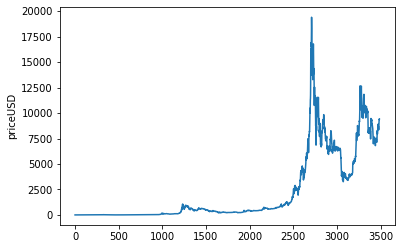

In [5]:
plt.plot(data['priceUSD'])
plt.ylabel('priceUSD')
plt.show()

Check if data has has any missing values

In [6]:
data.isnull().any().sum()

0

Stationary or Non-Stationary:

To check if the data is stationary or Non-stationary , we will split the data into 4 parts of equal intervals based on time and plot box plots.

In [7]:
data=data.sort_values('Date')
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


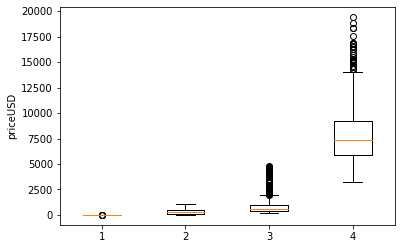

In [8]:
p1=data[:int(len(data)/4)]['priceUSD']
p2=data[int(len(data)/4):int(2*len(data)/4)]['priceUSD']
p3=data[int(2*len(data)/4):int(3*len(data)/4)]['priceUSD']
p4=data[int(3*len(data)/4):int(4*len(data)/4)]['priceUSD']
plt.boxplot([p1,p2,p3,p4])
plt.ylabel('priceUSD')
plt.show()

Removing features with lower impact.

Reference:
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

Adjusting Data According to the Model

For End of day

In [ ]:
# No Need of Adjustment

Method 1

Using RFE with Pearson correlation:

RFE splits the data and runs many models with different subsets of input features and select those features that result in the best performing model according to a performance metric.

In [9]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [10]:
y_test=x_test['priceUSD']

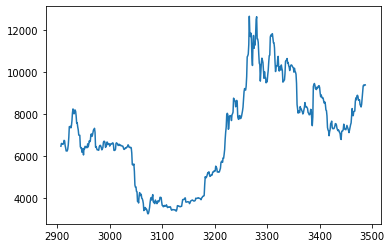

In [11]:
plt.plot(x_test['priceUSD'])

In [12]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','priceUSD'],axis=1), x_train['priceUSD'], test_size=0.16, random_state=42)

In [13]:
features=x_train.columns
ss=MinMaxScaler().fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train),columns=features)
x_cv=pd.DataFrame(ss.transform(x_cv),columns=features)
x_test=pd.DataFrame(ss.transform(x_test.drop(['Date','priceUSD'],axis=1)),columns=features)

In [14]:
# features=x_train.columns
# ss=RobustScaler().fit(x_train)
# x_train=pd.DataFrame(ss.transform(x_train),columns=features)
# x_cv=pd.DataFrame(ss.transform(x_cv),columns=features)
# x_test=pd.DataFrame(ss.transform(x_test),columns=features)

In [33]:
x_train.shape

(2441, 735)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 735)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 350)               257600    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               35100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 255       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 298,011
Trainable params: 298,011
Non-trainable params: 0
_____________________________________________________

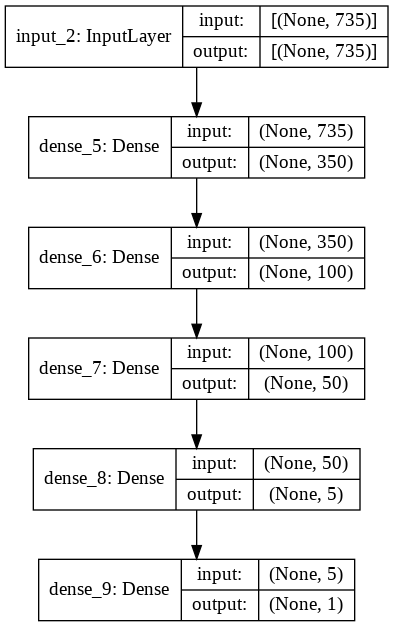

In [34]:
input_path1= Input(shape=(735))
dense1  =Dense(350,activation='relu',kernel_initializer='he_uniform')(input_path1)
dense2  =Dense(100,activation='relu',kernel_initializer='he_uniform')(dense1)
dense3  =Dense(50,activation='relu',kernel_initializer='he_uniform')(dense2)
dense4  =Dense(5,activation='relu',kernel_initializer='he_uniform')(dense3)
Output =Dense(1,activation='linear')(dense4)

model= Model(inputs=input_path1,outputs=Output)

model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [35]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='log_cosh',optimizer=opt,metrics=['mean_squared_error','mean_absolute_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [31]:
class CustomCallBacks(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        
        self.SaveModel=None
        
        self.x_train=x_train
        
        self.Y_train=y_train
                
        self.history={'mse':[]}
        
        self.historyV={'mse':[]}
        
        self.epoch=None
        
    def on_epoch_begin(self, epoch, logs=None):
        
        self.epoch=epoch
            
    def on_epoch_end(self, epoch, logs={}):
        
        self.history['mse'].append(logs.get('mean_squared_error'))
          
        if np.isnan(logs.get('loss')) or np.isinf(logs.get('loss')):

                print("Invalid loss and terminated at epoch {}".format(epoch))
          
                self.model.stop_training = True
        
        if len(self.history['mse'])>=2:
            
            if self.history['mse'][-1]<self.history['mse'][-2]:
            
                self.SaveModel=self.model
        
        else:
        
          self.SaveModel=self.model
    
    def on_test_begin(self, logs=None):
        
        self.validationX=x_cv
        
        self.validationY=y_cv
    
    def on_test_end(self, logs=None):
        
        self.historyV['mse'].append(logs.get('mean_squared_error'))
               
        if self.epoch>=3:
         
          if self.historyV['mse'][-2]<self.historyV['mse'][-1] :          
         
            lr=tf.keras.backend.get_value(self.model.optimizer.lr)
            
            tf.keras.backend.set_value(self.model.optimizer.lr,lr*0.90)

In [32]:
cb=CustomCallBacks()

In [38]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=30,callbacks=[tensorboard_callback,cb])

Epoch 1/30
2441/2441 [==============================] - 8s 3ms/step - loss: 352.6155 - mean_squared_error: 1165036.2500 - mean_absolute_error: 353.2916 - val_loss: 181.5152 - val_mean_squared_error: 191524.1719 - val_mean_absolute_error: 182.1817
Epoch 2/30
2441/2441 [==============================] - 7s 3ms/step - loss: 200.4223 - mean_squared_error: 256607.7188 - mean_absolute_error: 201.0913 - val_loss: 141.3364 - val_mean_squared_error: 127419.6406 - val_mean_absolute_error: 142.0240
Epoch 3/30
2441/2441 [==============================] - 7s 3ms/step - loss: 155.3865 - mean_squared_error: 143247.2656 - mean_absolute_error: 156.0501 - val_loss: 101.1263 - val_mean_squared_error: 80325.3594 - val_mean_absolute_error: 101.8119
Epoch 4/30
2441/2441 [==============================] - 7s 3ms/step - loss: 133.4637 - mean_squared_error: 103199.0000 - mean_absolute_error: 134.1150 - val_loss: 86.9127 - val_mean_squared_error: 41609.8516 - val_mean_absolute_error: 87.5463
Epoch 5/30
2441/244

In [39]:
y_test_pred=model.predict(x_test).flatten()

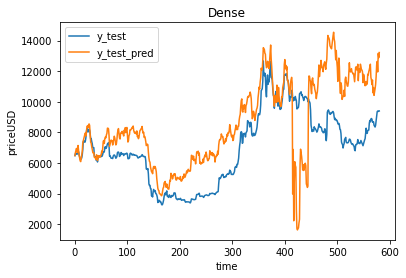

In [40]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title('Dense')
plt.show()

In [41]:
print(mean_squared_error(y_test, y_test_pred))

6979846.209175528


In [55]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [56]:
y_test=x_test['priceUSD']

In [57]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','priceUSD'],axis=1), x_train['priceUSD'], test_size=0.16, random_state=42)

In [58]:
features=x_train.columns
ss=RobustScaler().fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train),columns=features)
x_cv=pd.DataFrame(ss.transform(x_cv),columns=features)
x_test=pd.DataFrame(ss.transform(x_test.drop(['Date','priceUSD'],axis=1)),columns=features)

In [59]:
features=x_train.columns
ss=MinMaxScaler((0,1)).fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train),columns=features)
x_cv=pd.DataFrame(ss.transform(x_cv),columns=features)
x_test=pd.DataFrame(ss.transform(x_test),columns=features)

In [60]:
x_train.head()

,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,transactions30mom,transactions90mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.135821,0.210694,0.131045,0.000516,0.000415,0.000287,0.009419,0.002357,0.001936,0.341123,0.044321,0.041634,0.151315,0.633061,0.007733,0.142123,0.163049,0.156827,0.159081,0.190826,0.144299,0.154664,0.158783,0.164416,0.182364,0.140062,0.157285,0.157773,0.159422,0.176838,0.391217,0.209330,0.174722,0.117517,0.108100,0.447815,0.564949,0.573453,0.537454,0.552686,...,0.036490,0.040507,0.046242,0.053780,0.060173,0.035430,0.038804,0.043183,0.050717,0.060447,0.216980,0.183872,0.209759,0.281361,0.430432,0.474298,0.438096,0.409665,0.449616,0.434728,0.009795,0.033170,0.024229,0.014504,0.031551,0.000096,0.001100,0.000587,0.000210,0.000995,0.034631,0.151335,0.295053,0.440133,0.545954,0.325897,0.166510,0.097301,0.043387,0.054164
1,0.475109,0.687014,0.393550,0.035186,0.031653,0.000002,0.018474,0.001563,0.001323,0.315426,0.024869,0.023958,0.345989,0.566208,0.024966,0.527009,0.548149,0.564706,0.576337,0.632266,0.521049,0.553918,0.569560,0.587520,0.632549,0.516612,0.551100,0.568947,0.572481,0.612914,0.409188,0.205689,0.176243,0.134227,0.128275,0.451588,0.442175,0.633659,0.543892,0.553854,...,0.024023,0.025040,0.027018,0.029866,0.035863,0.023701,0.024413,0.025635,0.028342,0.032277,0.362478,0.273810,0.267192,0.252515,0.163974,0.482539,0.452438,0.424171,0.462207,0.425421,0.001420,0.001166,0.002126,0.003592,0.004153,0.000002,0.000001,0.000005,0.000013,0.000017,0.757960,0.608579,0.623519,0.613823,0.585605,0.405024,0.244130,0.179912,0.087041,0.031091
2,0.099430,0.168620,0.061683,0.000001,0.000001,0.010044,0.001882,0.001139,0.001015,0.398903,0.012050,0.009080,0.058399,0.582936,0.028017,0.115403,0.126214,0.124992,0.147091,0.154364,0.113950,0.123061,0.130179,0.142776,0.152998,0.111739,0.125552,0.123954,0.136747,0.156781,0.400246,0.192961,0.144234,0.138358,0.200241,0.424650,0.552905,0.534511,0.493057,0.578526,...,0.003556,0.003458,0.003363,0.003162,0.002689,0.003523,0.003526,0.003318,0.003189,0.002590,0.520719,0.532883,0.539890,0.538609,0.328189,0.482347,0.454298,0.425445,0.462671,0.424732,0.001542,0.002759,0.003944,0.003092,0.003249,0.000002,0.000008,0.000016,0.000010,0.000011,0.896226,0.896082,0.901740,0.912161,0.910771,0.435383,0.436730,0.354551,0.256373,0.151111
3,0.136137,0.250019,0.153670,0.002059,0.001885,0.000056,0.007680,0.001976,0.001701,0.332332,0.036701,0.022735,0.150996,0.593309,0.007297,0.133798,0.162196,0.162775,0.167664,0.195998,0.142292,0.153922,0.161669,0.171574,0.193772,0.136454,0.154652,0.159258,0.165556,0.186046,0.382318,0.196913,0.165468,0.118803,0.094249,0.441520,0.544389,0.543266,0.545898,0.504611,...,0.029887,0.029485,0.030213,0.032582,0.043456,0.029729,0.029395,0.028865,0.030321,0.036131,0.500886,0.381723,0.277556,0.183136,0.122739,0.487710,0.464405,0.433789,0.466573,0.425656,0.016404,0.018248,0.018551,0.010073,0.017110,0.000

In [61]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42).fit(x_train,y_train)
imp = list(map(lambda x : abs(x)*1000000 , rf.feature_importances_))

In [62]:
feature_importance=dict()
for i in range(len(x_train.columns)):
  feature_importance[x_train.columns[i]]=imp[i]

In [63]:
v=list(feature_importance.values())
sorted_v=sorted(v,reverse=True)
sorted_f=[]
for i in sorted_v:
   sorted_f.append(list(feature_importance.keys())[list(feature_importance.values()).index(i)])

[]

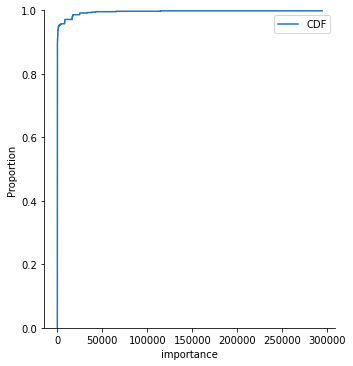

In [64]:
sns.displot(imp,kind="ecdf",label='CDF')
plt.xlabel('importance')
plt.legend()
plt.plot()

In [65]:
feature_final=[]
importances_final=[]
threshold=sorted_v[int(len(sorted_v)*0.50)]
for i in range(len(sorted_v)):
  if sorted_v[i]>threshold:
    importances_final.append(sorted_v[i])
    feature_final.append(sorted_f[i])
print(len(feature_final))

367


[]

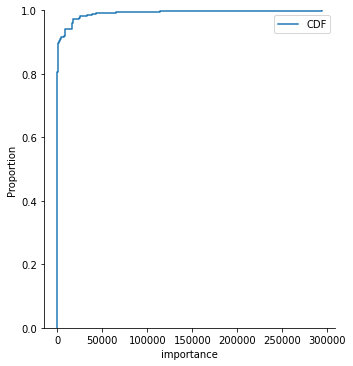

In [66]:
sns.displot(importances_final,kind="ecdf",label='CDF')
plt.xlabel('importance')
plt.legend()
plt.plot()

In [67]:
x_train=x_train[feature_final]
x_cv=x_cv[feature_final]
x_test=x_test[feature_final]

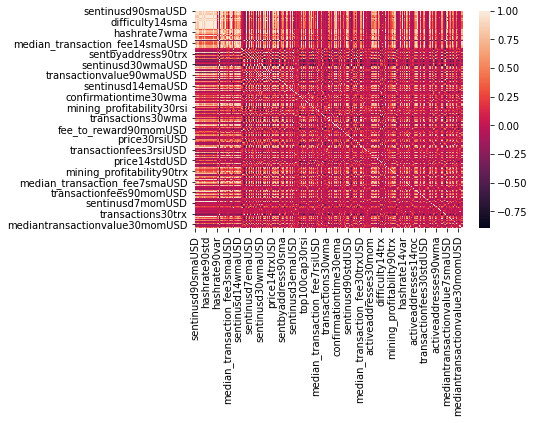

In [68]:
sns.heatmap(x_train.corr())

In [ ]:
# there are many features that are correlated among themselves

In [69]:
mat=x_train.corr().values
f_set= set()
for i in range(len(mat)):
  for j in range(len(mat[i])):
    if i!=j and abs(mat[i][j])>0.90:
      f_set.add(feature_final[j])
print(len(f_set))


241


In [70]:
for i in list(f_set):
  feature_final.remove(i)
print(len(feature_final))

126


In [71]:
x_train=x_train[feature_final]
x_cv=x_cv[feature_final]
x_test=x_test[feature_final]

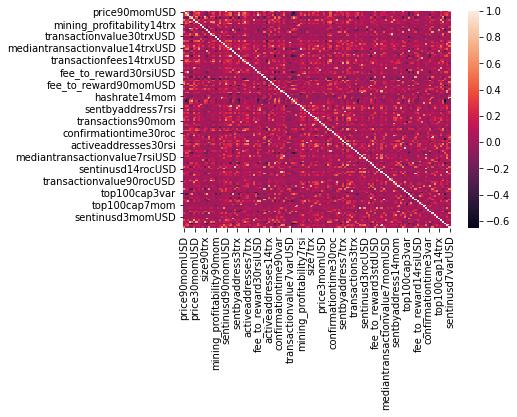

In [72]:
sns.heatmap(x_train.corr())

In [73]:
x_train.shape

(2441, 126)

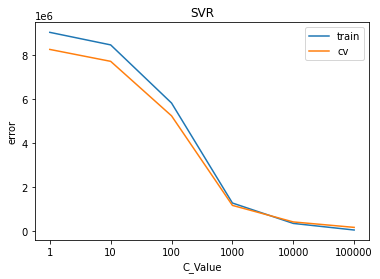

In [75]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = SVR(kernel='rbf',C=i, epsilon=0.2)
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('C_Value')
plt.xticks([0,1,2,3,4,5],[1,10,100,1000,10000,100000])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

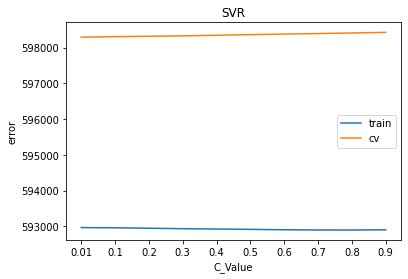

In [82]:
train=[]
cv=[]
for i in [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = SVR(kernel='rbf',C=3000, epsilon=i)
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('C_Value')
plt.xticks([0,1,2,3,4,5,6,7,8,9],[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

In [83]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=5000))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

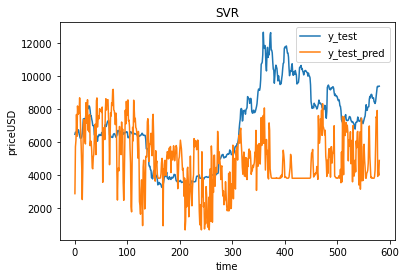

In [84]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("SVR")
plt.show()

In [85]:
print(mean_squared_error(y_test, y_test_pred))

11701119.81049476


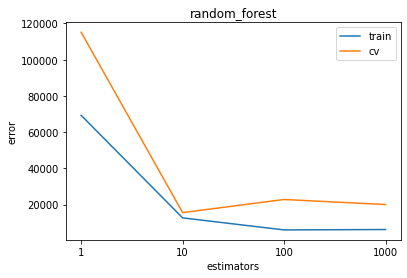

In [86]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = RandomForestRegressor(n_estimators=i)
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3],[1,10,100,1000])
plt.ylabel('error')
plt.title('random_forest')
plt.legend()
plt.show()

In [87]:
regr = RandomForestRegressor(n_estimators=10)
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

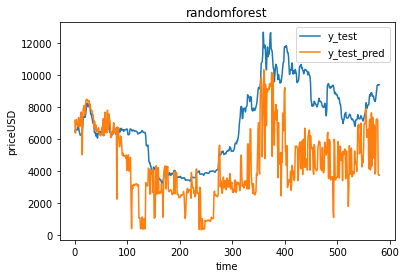

In [88]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("randomforest")
plt.show()

In [89]:
print(mean_squared_error(y_test, y_test_pred))

10355664.663200814


[12:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


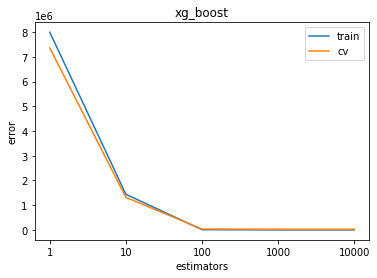

In [90]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = XGBRegressor(n_estimators=i,n_jobs=-1)
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4],[1,10,100,1000,10000])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[12:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

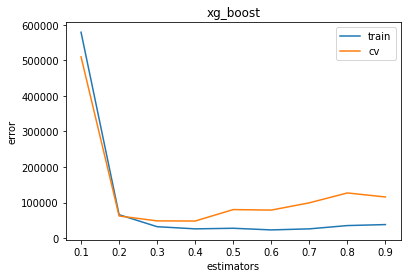

In [91]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = XGBRegressor(n_estimators=15,learning_rate=i,n_jobs=-1)
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4,5,6,7,8],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[12:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


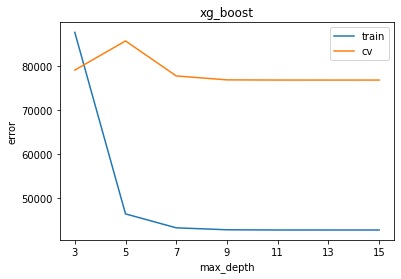

In [93]:
train=[]
cv=[]
for i in [3,5,7,9,11,13,15]:
  regr = XGBRegressor(n_estimators=15,learning_rate=0.18,max_depth=i,n_jobs=-1)
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('max_depth')
plt.xticks([0,1,2,3,4,5,6],[3,5,7,9,11,13,15])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

In [94]:
regr = XGBRegressor(n_estimators=15,learning_rate=0.18,max_depth=3,n_jobs=-1)
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

[12:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


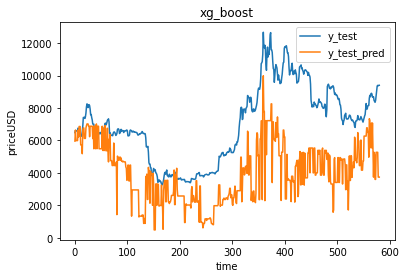

In [95]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("xg_boost")
plt.show()

In [96]:
print(mean_squared_error(y_test, y_test_pred))

12561007.584043851


Method 2

Using PCA:

In [97]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [98]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [99]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [100]:
y_test = x_test['priceUSD']
x_test = x_test.drop(['Date','priceUSD'],axis=1)

In [101]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','priceUSD'],axis=1), x_train['priceUSD'], test_size=0.16, random_state=42)

In [102]:
for i in [10,30,50,70,100]:
  pca = PCA(n_components=i)
  pca = pca.fit(x_train,y_train)
  x_train_pca=pd.DataFrame(pca.transform(x_train))
  x_cv_pca=pd.DataFrame(pca.transform(x_cv))
  x_test_pca=pd.DataFrame(pca.transform(x_test))
  regr = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=100))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  print(mean_squared_error(y_train, y_train_pred))

15430.190918590826
19993.626205816392
16850.345726092743
18545.180724363592
23301.039261306603


In [103]:
pca = PCA(n_components=50)
pca = pca.fit(x_train,y_train)
x_train_pca=pd.DataFrame(pca.transform(x_train))
x_cv_pca=pd.DataFrame(pca.transform(x_cv))
x_test_pca=pd.DataFrame(pca.transform(x_test))

In [104]:
x_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-4.414908e+44,-1.012226e+36,-5.480779e+33,1.036558e+34,2.526781e+33,-2.206519e+33,-5.179721e+20,1.073258e+20,-4.456056e+18,5.088642e+19,1.244947e+19,-4.517714e+18,5.728533e+17,-5.296511e+17,1.921640e+18,-7.301362e+17,-7.318567e+17,-1.594918e+17,-3.602650e+16,2.331987e+16,-2.059018e+16,5.273479e+15,6.755642e+15,-6.856980e+15,6.684118e+15,-5.405889e+16,3.089734e+16,-3.697251e+16,-1.522668e+16,-3.035556e+16,2.648041e+16,2.824924e+16,2.072521e+16,3.972226e+16,-1.879024e+16,2.184104e+15,-5.297935e+15,-3.453068e+15,-1.062482e+15,3.969244e+15,-8.174637e+15,-2.026753e+15,-1.934408e+16,-3.312882e+15,-8.081596e+16,-3.957104e+17,-6.148463e+16,1.201479e+16,-2.084660e+17,1.224914e+17
1,-4.414908e+44,-1.012226e+36,-5.480779e+33,1.036558e+34,2.526781e+33,-2.206519e+33,-5.179721e+20,1.073258e+20,-4.456054e+18,5.088642e+19,1.244948e+19,-4.517708e+18,5.729562e+17,-5.295559e+17,1.921625e+18,-7.301423e+17,-7.318779e+17,-1.594915e+17,-3.603154e+16,2.331440e+16,-2.058313e+16,5.271268e+15,6.753725e+15,-6.856699e+15,6.685965e+15,-5.406151e+16,3.089170e+16,-3.696852e+16,-1.522586e+16,-3.035458e+16,2.648031e+16,2.824952e+16,2.072500e+16,3.972372e+16,-1.879025e+16,2.183926e+15,-5.297386e+15,-3.453936e+15,-1.061942e+15,3.969356e+15,-8.174645e+15,-2.026766e+15,-1.934408e+16,-3.312882e+15,-8.081596e+16,-3.957104e+17,-6.148463e+16,1.201479e+16,-2.084660e+17,1.224914e+17
2,-4.414908e+44,-9.993796e+35,-4.215174e+33,7.297797e+33,5.633997e+32,1.294419e+33,4.917926e+20,8.320491e+19,-1.599367e+19,3.728055e+19,1.122956e+19,-2.458477e+18,1.852073e+18,-1.861576e+16,-2.163698e+18,7.064064e+17,1.318492e+18,-6.635899e+16,1.774063e+17,1.052689e+17,-1.009074e+17,6.191211e+16,6.820833e+16,-1.324737e+16,4.714870e+16,-2.385865e+16,-7.642706e+16,7.331443e+16,8.245609e+15,3.002503e+16,-2.302958e+16,-3.843926e+16,1.283188e+16,1.046646e+16,-1.224026e+16,4.667904e+15,-3.701489e+15,2.728258e+15,-3.327096e+15,8.203148e+15,-5.417130e+15,4.085468e+15,-1.116946e+16,-8.255121e+14,-4.825627e+16,-2.627303e+17,-3.826597e+16,1.236858e+16,-1.384910e+17,8.115697e+16
3,-4.414908e+44,-8.168841e+35,-2.148460e+34,1.602160e+33,9.891093e+33,1.231923e+34,4.617543e+21,3.525273e+20,5.528640e+19,1.381067e+20,4.091246e+19,-2.754014e+19,5.343114e+18,2.108584e+18,-6.018118e+18,2.700566e+18,2.513162e+18,1.236240e+16,-9.027051e+17,-3.652584e+17,-7.551000e+16,-3.250850e+17,-7.775743e+16,3.745973e+17,2.108714e+17,8.531522e+16,-1.572797e+17,2.321056e+17,-7.416203e+16,2.351052e+17,2.779033e+17,7.485604e+16,5.482932e+16,-1.299671e+17,8.327458e+16,1.976600e+16,1.802079e+16,-2.452423e+16,-2.960439e+16,1.044362e+17,-7.616415e+16,4.723563e+16,-5.049649e+15,-1.069579e+15,-1.666462e+16,-1.194141e+17,1.092268e+17,-1.263559e+17,2.674070e+15,4.911313e+16
4,-4.414908e+44,-8.933150e+35,8.183160e+33,1.065696e+34,1.714564e+34,-8.636054e+33,-1.284830e+21,7.773459e+19,-8.907449e+19,-8.662807e+19,-4.522140e+18,6.826102e+17,4.885100e+18,1.150406e+18,-9.067676e+18,2.482401e+18,2.224753e+18,1.364333e+18,2.338771e+17,3.476204e+17,-1.472175e+17,-1.250302e+17,1.464961e+17,-1.018345e+17,-3.858891e+17,2.459331e+17,1.487430e+17,-1.928391e+17,-1.483972e+17,-1.191309e+17,2.665988e+17,1.367197e+17,2.333707e+17,1.936543e+17,-4.891893e+16,1.139532e+16,-3.150548e+15,-3.534164e+16,-2.033608e+16,5.234013e+16,-6.912736e+16,2.715202e+15,-3.771559e+16,-1.376445e+16,-1.370660e+17,-5.436750e+17,4.154475e+15,-1.137366e+17,-2.339717e+17,1.772962e+17


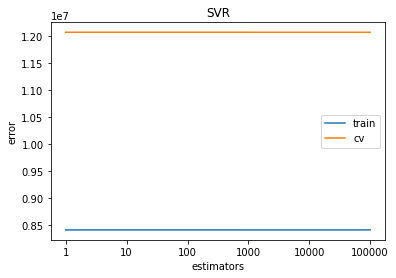

In [107]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),MinMaxScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4,5],[1,10,100,1000,10000,100000])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

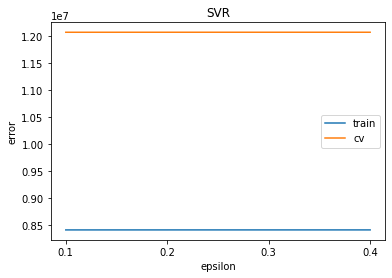

In [110]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),MinMaxScaler(), SVR(kernel='rbf',C=10000, epsilon=i))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('epsilon')
plt.xticks([0,1,2,3],[0.1,0.2,0.3,0.4])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

In [112]:
regr = SVR(C=10)
regr.fit(x_train_pca,y_train)
y_test_pred=regr.predict(x_test_pca)

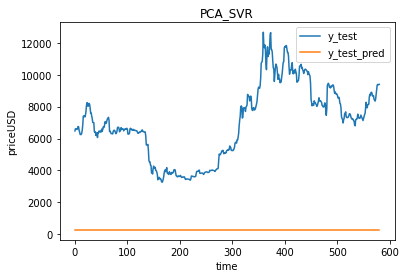

In [113]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("PCA_SVR")
plt.show()

In [114]:
print(mean_squared_error(y_test, y_test_pred))

50801290.17839929


100%|██████████| 4/4 [00:15<00:00,  3.84s/it]


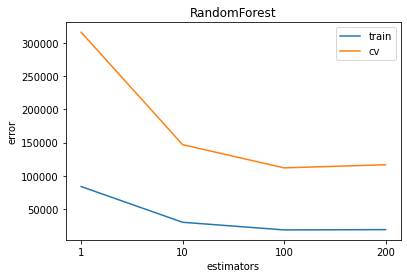

In [116]:
train=[]
cv=[]
for i in tqdm([1,10,100,200]):
  regr = make_pipeline(RobustScaler(),MinMaxScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3],[1,10,100,200])
plt.ylabel('error')
plt.title('RandomForest')
plt.legend()
plt.show()

In [117]:
regr =make_pipeline(RobustScaler(),MinMaxScaler(),RandomForestRegressor(n_estimators=100))
regr.fit(x_train_pca,y_train)
y_test_pred=regr.predict(x_test_pca)

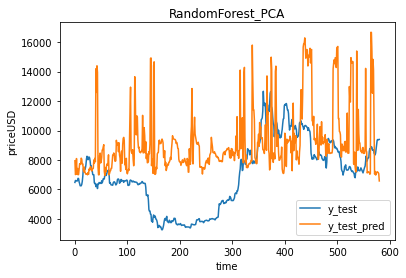

In [118]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("RandomForest_PCA")
plt.show()

In [119]:
print(mean_squared_error(y_test, y_test_pred))

12134748.883064201


[12:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


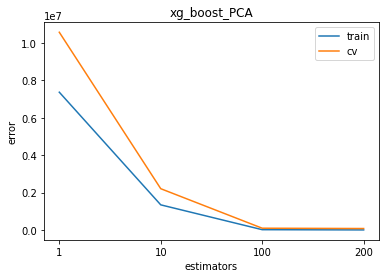

In [120]:
train=[]
cv=[]
for i in [1,10,100,200]:
  regr = make_pipeline(RobustScaler(),MinMaxScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3],[1,10,100,200])
plt.ylabel('error')
plt.title('xg_boost_PCA')
plt.legend()
plt.show()

[12:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

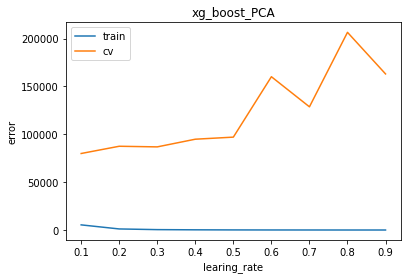

In [122]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),MinMaxScaler(), XGBRegressor(n_estimators=200,learning_rate=i,n_jobs=-1))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('learing_rate')
plt.xticks([0,1,2,3,4,5,6,7,8],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('xg_boost_PCA')
plt.legend()
plt.show()

[12:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


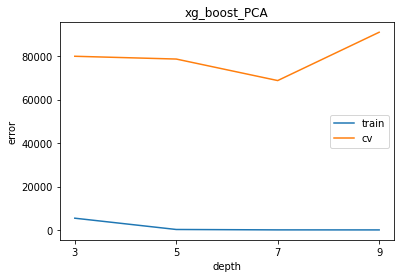

In [123]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),MinMaxScaler(), XGBRegressor(n_estimators=200,learning_rate=0.1,max_depth=i,n_jobs=-1))
  regr.fit(x_train_pca,y_train)
  y_train_pred=regr.predict(x_train_pca)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv_pca)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('depth')
plt.xticks([0,1,2,3],[3,5,7,9])
plt.ylabel('error')
plt.title('xg_boost_PCA')
plt.legend()
plt.show()

In [124]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=200,learning_rate=0.1,depth=7,n_jobs=-1))
regr.fit(x_train_pca,y_train)
y_test_pred=regr.predict(x_test_pca)

[12:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


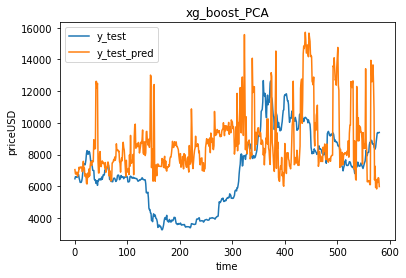

In [125]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("xg_boost_PCA")
plt.show()

In [126]:
print(mean_squared_error(y_test, y_test_pred))

10553100.763907814


Method 3

Wrapper

In [165]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [166]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [167]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

In [168]:
y_test = x_test['priceUSD']
x_test = x_test.drop(['Date','priceUSD'],axis=1)

In [169]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','priceUSD'],axis=1), x_train['priceUSD'], test_size=0.16, random_state=42)

In [164]:
features=x_train.columns
ss=MinMaxScaler((0,1)).fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train),columns=features)
x_cv=pd.DataFrame(ss.transform(x_cv),columns=features)
x_test=pd.DataFrame(ss.transform(x_test),columns=features)

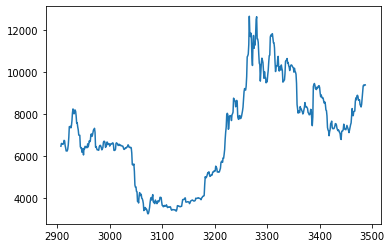

In [170]:
plt.plot(y_test)

In [171]:
estimator= SVR(kernel='linear')
selector = RFE(estimator)
selector = selector.fit(x_train,y_train)
Features = selector.support_

In [173]:
sp      = SelectPercentile(f_regression).fit(x_train[x_train.columns[Features]], y_train)
x_train = pd.DataFrame(sp.transform(x_train[x_train.columns[Features]]))
x_cv = pd.DataFrame(sp.transform(x_cv[x_cv.columns[Features]]))
x_test = pd.DataFrame(sp.transform(x_test[x_test.columns[Features]]))

In [174]:
x_train.shape

(2441, 37)

In [176]:
features=x_train.columns
ss=MinMaxScaler((0,1)).fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train))
x_cv=pd.DataFrame(ss.transform(x_cv))
x_test=pd.DataFrame(ss.transform(x_test))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 37)]              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                380       
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 4         
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


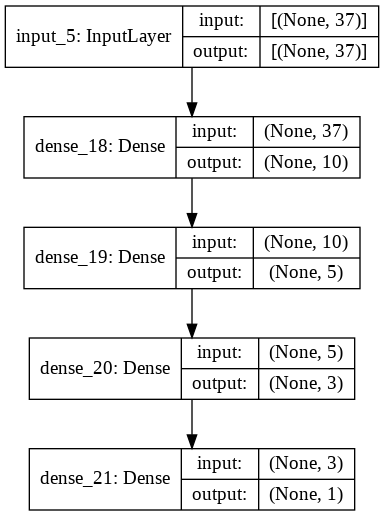

In [178]:
input_path1= Input(shape=(37))
dense1  =Dense(10,activation='relu',kernel_initializer='he_uniform')(input_path1)
dense2  =Dense(5,activation='relu',kernel_initializer='he_uniform')(dense1)
dense3  =Dense(3,activation='relu',kernel_initializer='he_uniform')(dense2)
Output =Dense(1,activation='linear')(dense3)

model= Model(inputs=input_path1,outputs=Output)

model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [179]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='log_cosh',optimizer=opt,metrics=['mean_squared_error','mean_absolute_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [193]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=30,callbacks=[tensorboard_callback,cb])

Epoch 1/30
2441/2441 [==============================] - 4s 2ms/step - loss: 51.0391 - mean_squared_error: 31289.7969 - mean_absolute_error: 51.6313 - val_loss: 46.0907 - val_mean_squared_error: 29414.2227 - val_mean_absolute_error: 46.6923
Epoch 2/30
2441/2441 [==============================] - 4s 2ms/step - loss: 50.9857 - mean_squared_error: 31083.5234 - mean_absolute_error: 51.5745 - val_loss: 46.0711 - val_mean_squared_error: 29364.7988 - val_mean_absolute_error: 46.6681
Epoch 3/30
2441/2441 [==============================] - 4s 2ms/step - loss: 50.9838 - mean_squared_error: 31116.3008 - mean_absolute_error: 51.5710 - val_loss: 45.9441 - val_mean_squared_error: 29131.5254 - val_mean_absolute_error: 46.5419
Epoch 4/30
2441/2441 [==============================] - 4s 2ms/step - loss: 50.9499 - mean_squared_error: 31183.6387 - mean_absolute_error: 51.5368 - val_loss: 45.9488 - val_mean_squared_error: 29132.2656 - val_mean_absolute_error: 46.5462
Epoch 5/30
2441/2441 [==================

In [194]:
y_test_pred=model.predict(x_test).flatten()

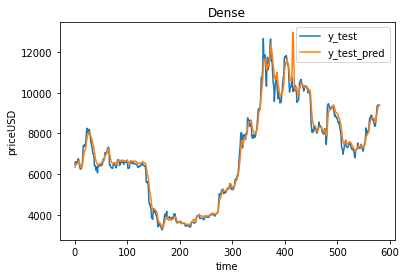

In [195]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title('Dense')
plt.show()

In [196]:
print(mean_squared_error(y_test, y_test_pred))

109480.34445920592


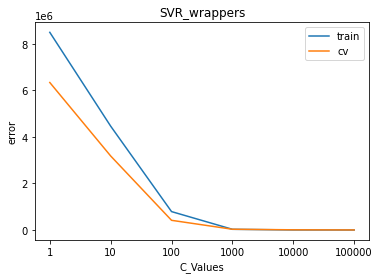

In [197]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('C_Values')
plt.xticks([0,1,2,3,4,5],[1,10,100,1000,10000,100000])
plt.ylabel('error')
plt.title('SVR_wrappers')
plt.legend()
plt.show()

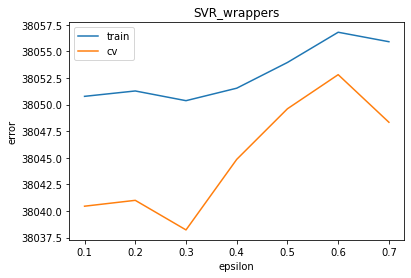

In [200]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=800, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('epsilon')
plt.xticks([0,1,2,3,4,5,6],[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.ylabel('error')
plt.title('SVR_wrappers')
plt.legend()
plt.show()

In [201]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=800,epsilon=0.3))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

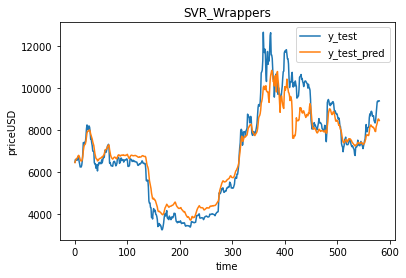

In [202]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("SVR_Wrappers")
plt.show()

In [203]:
print(mean_squared_error(y_test, y_test_pred))

481473.46719051845


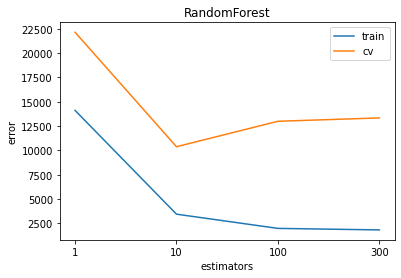

In [204]:
train=[]
cv=[]
for i in [1,10,100,300]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3],[1,10,100,300])
plt.ylabel('error')
plt.title('RandomForest')
plt.legend()
plt.show()

In [205]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=10))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

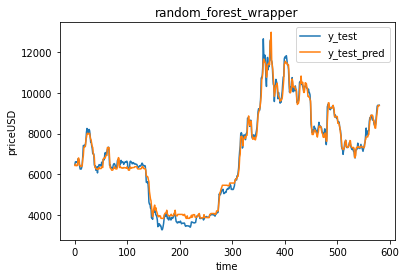

In [206]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("random_forest_wrapper")
plt.show()

In [207]:
print(mean_squared_error(y_test, y_test_pred))

54907.52182444062


[13:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


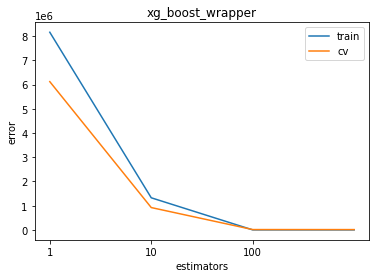

In [208]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2],[1,10,100])
plt.ylabel('error')
plt.title('xg_boost_wrapper')
plt.legend()
plt.show()

[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

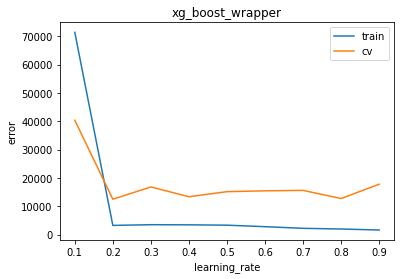

In [217]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=25,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('learning_rate')
plt.xticks([0,1,2,3,4,5,6,7,8],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('xg_boost_wrapper')
plt.legend()
plt.show()

[13:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


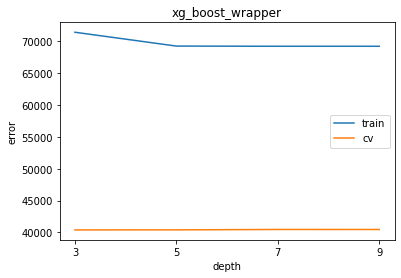

In [219]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=25,learning_rate=0.1,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('depth')
plt.xticks([0,1,2,3],[3,5,7,9])
plt.ylabel('error')
plt.title('xg_boost_wrapper')
plt.legend()
plt.show()

In [221]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=25,learning_rate=0.1,max_depth=5,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

[13:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


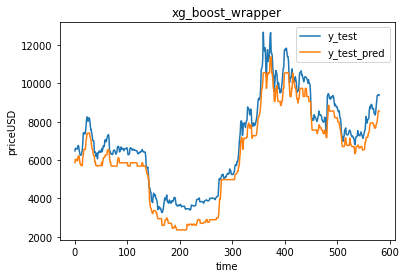

In [222]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("xg_boost_wrapper")
plt.show()

In [223]:
print(mean_squared_error(y_test, y_test_pred))

670088.968699181


In [ ]:
myTable = PrettyTable(["Feature_Engineering_Tech", "Model", "RMSE", "MAPE"])
myTable.add_row(["Filter", "SVR", "8847526.60", ""])
myTable.add_row(["Filter", "randomforest", "17625172.83", ""])
myTable.add_row(["Filter", "xg_boost", "17501554.49", ""])
myTable.add_row(["PCA", "SVR", "7587524.92", ""])
myTable.add_row(['PCA', "randomforest", "7395649.80", ""])
myTable.add_row(["PCA", "xg_boost", "264710.25", ""])
myTable.add_row(["Wrapper", "SVR", "503609.92", ""])
myTable.add_row(["Wrapper", "randomforest", "432358.10", ""])
myTable.add_row(["Wrapper", "xg_boost", "1103227.81", ""])

In [ ]:
print(myTable)

+--------------------------+--------------+-------------+------+
| Feature_Engineering_Tech |    Model     |     RMSE    | MAPE |
+--------------------------+--------------+-------------+------+
|          Filter          |     SVR      |  8847526.60 |      |
|          Filter          | randomforest | 17625172.83 |      |
|          Filter          |   xg_boost   | 17501554.49 |      |
|           PCA            |     SVR      |  7587524.92 |      |
|           PCA            | randomforest |  7395649.80 |      |
|           PCA            |   xg_boost   |  264710.25  |      |
|         Wrapper          |     SVR      |  503609.92  |      |
|         Wrapper          | randomforest |  432358.10  |      |
|         Wrapper          |   xg_boost   |  1103227.81 |      |
+--------------------------+--------------+-------------+------+


In [ ]:
# among the methods wrapper is best way but it is biased towards initial filtering model 

For 7 day interval

In [236]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [237]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [238]:
data['After_7']=0
for i in range(len(data['Date'])):
 data['After_7'].iloc[i]  = re.sub('-','/',str(datetime.strptime(data['Date'].iloc[i],'%Y/%m/%d') + relativedelta(days=+7))[:10])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [239]:
data.head(2)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_7
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.0010,539.000,1396.0,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.5,1331.0,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/07/24
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.0163,386.333,1407.0,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.0,1044.0,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/07/25


In [240]:
after_7=data[['Date','priceUSD']]
after_7['After_7']=after_7['Date']
after_7['priceUSD_7']=after_7['priceUSD']
after_7=after_7.drop(['Date','priceUSD'],axis=1)
data=data.merge(after_7,on='After_7')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [241]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_7,priceUSD_7
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/07/24,0.0581
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/07/25,0.0530
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/07/26,0.0530
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0,2010/07/27,0.0580
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0,2010/07/28,0.0595


In [272]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

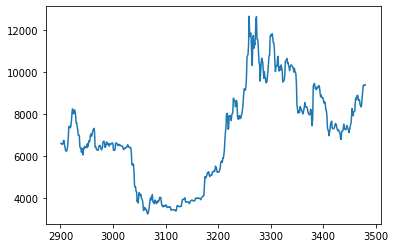

In [273]:
plt.plot(x_test['priceUSD_7'])

In [274]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','After_7','priceUSD_7'],axis=1),x_train['priceUSD_7'])
Features = selector.support_

In [275]:
y_test = x_test['priceUSD_7']
x_test = x_test.drop(['Date','After_7','priceUSD_7'],axis=1)[x_test.drop(['Date','After_7','priceUSD_7'],axis=1).columns[Features]]

In [276]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','After_7','priceUSD_7'],axis=1)[x_train.drop(['Date','After_7','priceUSD_7'],axis=1).columns[Features]], x_train['priceUSD_7'], test_size=0.16, random_state=42)

In [277]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = pd.DataFrame(sp.transform(x_train))
x_cv = pd.DataFrame(sp.transform(x_cv))
x_test = pd.DataFrame(sp.transform(x_test))

In [278]:
features=x_train.columns
ss=MinMaxScaler((0,1)).fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train))
x_cv=pd.DataFrame(ss.transform(x_cv))
x_test=pd.DataFrame(ss.transform(x_test))

In [279]:
x_train.shape

(2436, 37)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 37)]              0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                380       
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_52 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 4         
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


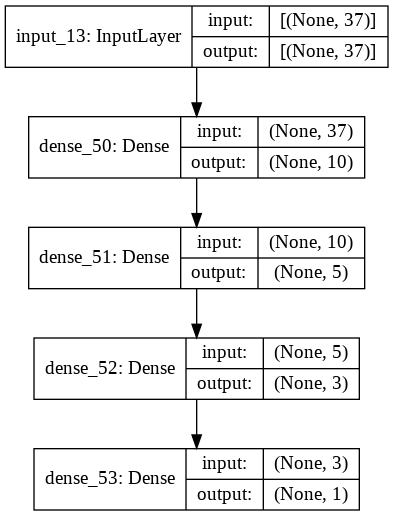

In [288]:
input_path1= Input(shape=(37))
dense1  =Dense(10,activation='relu',kernel_initializer='he_uniform')(input_path1)
dense2  =Dense(5,activation='relu',kernel_initializer='he_uniform')(dense1)
dense3  =Dense(3,activation='relu',kernel_initializer='he_uniform')(dense2)
Output =Dense(1,activation='linear')(dense3)

model= Model(inputs=input_path1,outputs=Output)

model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [289]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='log_cosh',optimizer=opt,metrics=['mean_squared_error','mean_absolute_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [293]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=60,callbacks=[tensorboard_callback,cb])

Epoch 1/60
2436/2436 [==============================] - 4s 2ms/step - loss: 153.5895 - mean_squared_error: 288197.0938 - mean_absolute_error: 154.2059 - val_loss: 124.9204 - val_mean_squared_error: 145063.7656 - val_mean_absolute_error: 125.5396
Epoch 2/60
2436/2436 [==============================] - 4s 2ms/step - loss: 153.2292 - mean_squared_error: 286326.4062 - mean_absolute_error: 153.8462 - val_loss: 125.7756 - val_mean_squared_error: 145551.1250 - val_mean_absolute_error: 126.4238
Epoch 3/60
2436/2436 [==============================] - 4s 2ms/step - loss: 153.3385 - mean_squared_error: 288646.7188 - mean_absolute_error: 153.9544 - val_loss: 125.4209 - val_mean_squared_error: 146718.4531 - val_mean_absolute_error: 126.0387
Epoch 4/60
2436/2436 [==============================] - 4s 2ms/step - loss: 153.5935 - mean_squared_error: 289632.4688 - mean_absolute_error: 154.2063 - val_loss: 125.1414 - val_mean_squared_error: 146040.9844 - val_mean_absolute_error: 125.7538
Epoch 5/60
2436/

In [294]:
y_test_pred=model.predict(x_test).flatten()

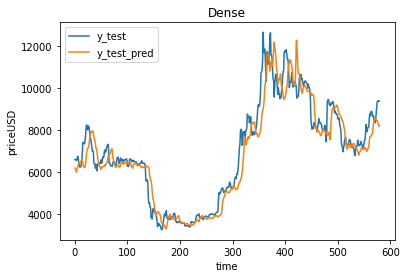

In [295]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title('Dense')
plt.show()

In [296]:
print(mean_squared_error(y_test, y_test_pred))

601577.8917839676


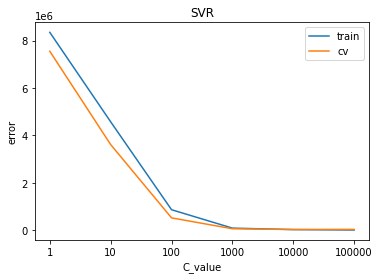

In [297]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('C_value')
plt.xticks([0,1,2,3,4,5],[1,10,100,1000,10000,100000])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

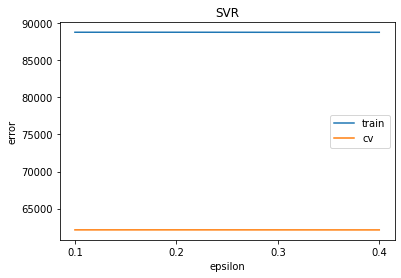

In [298]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=1000, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('epsilon')
plt.xticks([0,1,2,3],[0.1,0.2,0.3,0.4])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

In [299]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=1000, epsilon=0.1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

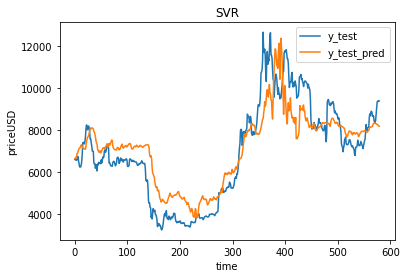

In [300]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("SVR")
plt.show()

In [301]:
print(mean_squared_error(y_test, y_test_pred))

1203813.1718097194


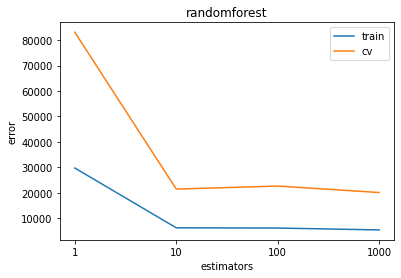

In [302]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3],[1,10,100,1000])
plt.ylabel('error')
plt.title('randomforest')
plt.legend()
plt.show()

In [303]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=1000))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

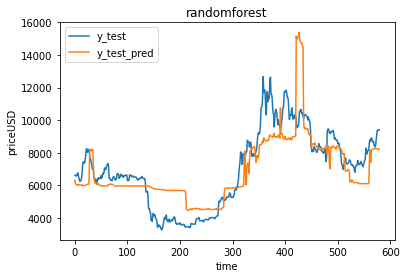

In [304]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("randomforest")
plt.show()

In [305]:
print(mean_squared_error(y_test, y_test_pred))

2076012.7864140084


[16:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


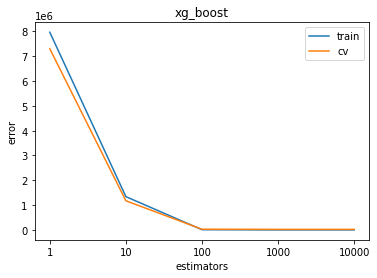

In [306]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4],[1,10,100,1000,10000])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

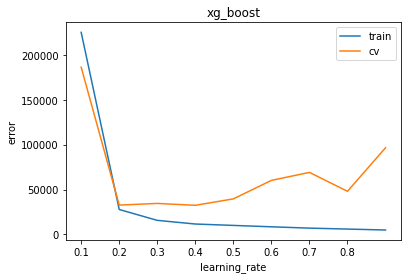

In [309]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=20,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('learning_rate')
plt.xticks([0,1,2,3,4,5,6,7],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[16:04:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:04:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


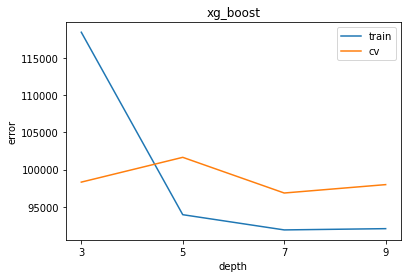

In [312]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=20,learning_rate=0.12,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('depth')
plt.xticks([0,1,2,3],[3,5,7,9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

In [313]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=20,learning_rate=0.12,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

[16:04:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


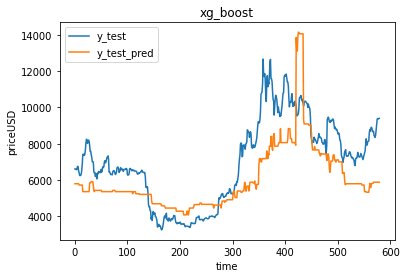

In [314]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("xg_boost")
plt.show()

In [315]:
print(mean_squared_error(y_test, y_test_pred))

3278397.012243395


For 1 Month

In [33]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [34]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [35]:
data['After_month']=0
for i in range(len(data['Date'])):
 data['After_month'].iloc[i]  = re.sub('-','/',str(datetime.strptime(data['Date'].iloc[i],'%Y/%m/%d') + relativedelta(months=+1))[:10])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [36]:
data.head(2)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_month
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.0010,539.000,1396.0,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.5,1331.0,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/08/17
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.0163,386.333,1407.0,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.0,1044.0,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/08/18


In [37]:
after_month=data[['Date','priceUSD']]
after_month['After_month']=after_month['Date']
after_month['priceUSD_month']=after_month['priceUSD']
after_month=after_month.drop(['Date','priceUSD'],axis=1)
data=data.merge(after_month,on='After_month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_month,priceUSD_month
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/08/17,0.0678
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/08/18,0.0690
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2010/08/19,0.0673
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0,2010/08/20,0.0661
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0,2010/08/21,0.0660


In [39]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

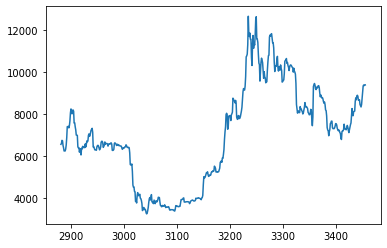

In [40]:
plt.plot(x_test['priceUSD_month'])

In [41]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','After_month','priceUSD_month'],axis=1),x_train['priceUSD_month'])
Features = selector.support_

In [42]:
y_test = x_test['priceUSD_month']
x_test = x_test.drop(['Date','After_month','priceUSD_month'],axis=1)[x_test.drop(['Date','After_month','priceUSD_month'],axis=1).columns[Features]]

In [43]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','After_month','priceUSD_month'],axis=1)[x_train.drop(['Date','After_month','priceUSD_month'],axis=1).columns[Features]], x_train['priceUSD_month'], test_size=0.16, random_state=42)

In [44]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = pd.DataFrame(sp.transform(x_train))
x_cv = pd.DataFrame(sp.transform(x_cv))
x_test = pd.DataFrame(sp.transform(x_test))

In [45]:
features=x_train.columns
ss=MinMaxScaler((0,1)).fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train))
x_cv=pd.DataFrame(ss.transform(x_cv))
x_test=pd.DataFrame(ss.transform(x_test))

In [46]:
x_train.shape

(2420, 37)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 37)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                570       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 24        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 710
Trainable params: 710
Non-trainable params: 0
_____________________________________________________________

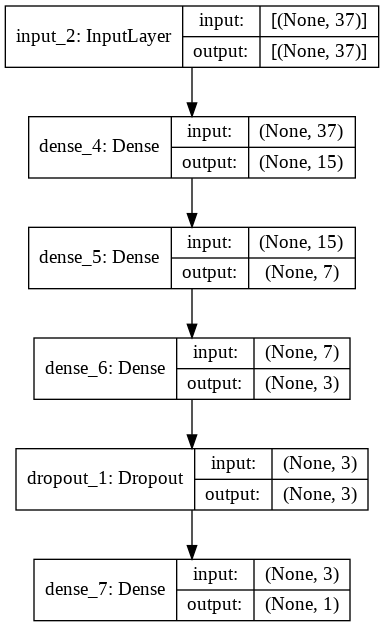

In [47]:
input_path1= Input(shape=(37))
dense1  =Dense(15,activation='relu',kernel_initializer='he_uniform')(input_path1)
dense2  =Dense(7,activation='relu',kernel_initializer='he_uniform')(dense1)
dense3  =Dense(3,activation='relu',kernel_initializer='he_uniform')(dense2)
dropout =Dropout(0.2)(dense3)
Output =Dense(1,activation='linear')(dropout)

model= Model(inputs=input_path1,outputs=Output)

model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [48]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='log_cosh',optimizer=opt,metrics=['mean_squared_error','mean_absolute_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [49]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=60,callbacks=[tensorboard_callback,cb])

Epoch 1/60
2420/2420 [==============================] - 4s 1ms/step - loss: 978.1920 - mean_squared_error: 6559241.0000 - mean_absolute_error: 978.8750 - val_loss: 454.5095 - val_mean_squared_error: 1300629.6250 - val_mean_absolute_error: 455.1996
Epoch 2/60
2420/2420 [==============================] - 3s 1ms/step - loss: 549.0546 - mean_squared_error: 3293695.2500 - mean_absolute_error: 549.7195 - val_loss: 406.7713 - val_mean_squared_error: 1073419.6250 - val_mean_absolute_error: 407.4378
Epoch 3/60
2420/2420 [==============================] - 3s 1ms/step - loss: 517.9005 - mean_squared_error: 2737471.2500 - mean_absolute_error: 518.5673 - val_loss: 377.3398 - val_mean_squared_error: 954552.6250 - val_mean_absolute_error: 378.0072
Epoch 4/60
2420/2420 [==============================] - 3s 1ms/step - loss: 520.4624 - mean_squared_error: 3026980.7500 - mean_absolute_error: 521.1329 - val_loss: 387.6631 - val_mean_squared_error: 998399.4375 - val_mean_absolute_error: 388.3385
Epoch 5/60

In [50]:
y_test_pred=model.predict(x_test).flatten()

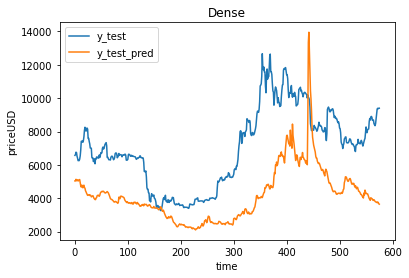

In [51]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title('Dense')
plt.show()

In [52]:
y_test_pred=model.predict(x_test).flatten()

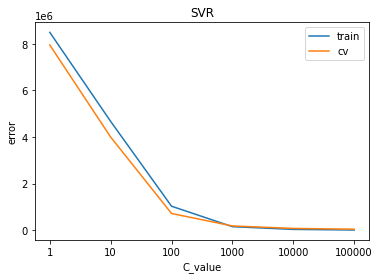

In [53]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('C_value')
plt.xticks([0,1,2,3,4,5],[1,10,100,1000,10000,100000])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

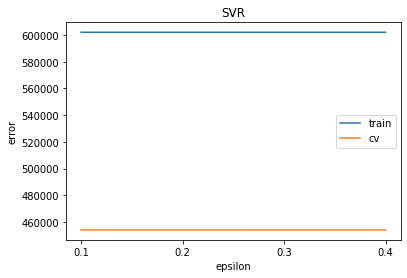

In [55]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=200, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('epsilon')
plt.xticks([0,1,2,3],[0.1,0.2,0.3,0.4])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

In [56]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=200))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

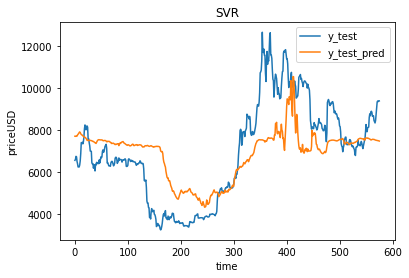

In [57]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("SVR")
plt.show()

In [58]:
print(mean_squared_error(y_test, y_test_pred))

2984119.704650777


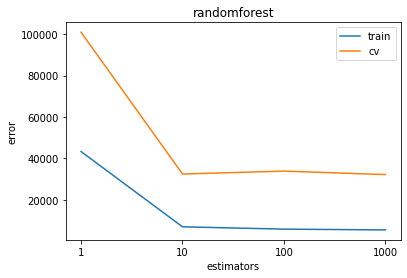

In [59]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3],[1,10,100,1000])
plt.ylabel('error')
plt.title('randomforest')
plt.legend()
plt.show()

In [60]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=10))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

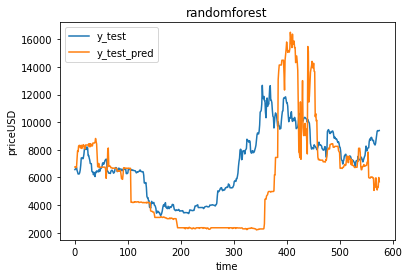

In [61]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("randomforest")
plt.show()

In [62]:
print(mean_squared_error(y_test, y_test_pred))

9157487.272152778


[13:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:04:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


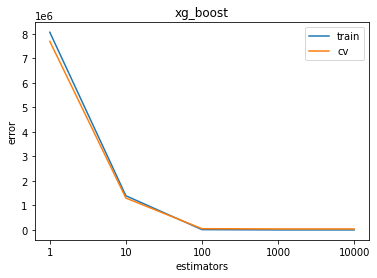

In [63]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4],[1,10,100,1000,10000])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

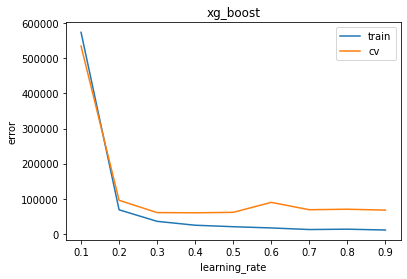

In [66]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=15,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('learning_rate')
plt.xticks([0,1,2,3,4,5,6,7,8],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[13:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:10:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


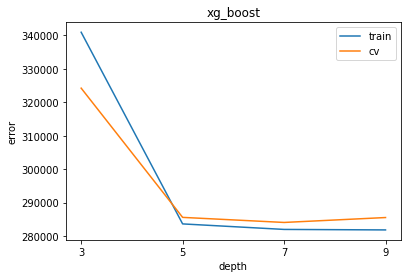

In [68]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=15,learning_rate=0.12,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('depth')
plt.xticks([0,1,2,3],[3,5,7,9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

In [69]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=15,learning_rate=0.12,depth=4,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

[13:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


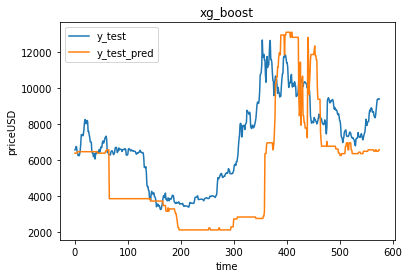

In [70]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("xg_boost")
plt.show()

In [71]:
print(mean_squared_error(y_test, y_test_pred))

7186881.185582381


In [ ]:
myTable = PrettyTable([ "Model", "RMSE", "MAPE"])
myTable.add_row(["SVR", "4144217.79", ""])
myTable.add_row(["randomforest", "11679078.18", ""])
myTable.add_row(["xg_boost", "11720304.19", ""])

In [ ]:
print(myTable)

+--------------+-------------+------+
|    Model     |     RMSE    | MAPE |
+--------------+-------------+------+
|     SVR      |  4144217.79 |      |
| randomforest | 11679078.18 |      |
|   xg_boost   | 11720304.19 |      |
+--------------+-------------+------+


For 3 Month

In [83]:
data=pd.read_csv('/content/drive/MyDrive/btc.csv')

In [84]:
data.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price3emaUSD,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.00100,539.000,1396.000,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.500,1331.000,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.01630,386.333,1407.000,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.000,1044.000,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,8.276,7.666,0.429,972,25.685,0.00154,279.000,1223.000,761.357,392.533,162.489,432.474,723.333,722.979,520.717,255.072,298.833,780.643,906.419,592.370,263.864,-21.422,5.376,15.270,9.526,2.078,-322,-1287,281,...,0.069,0.0,0.0,0.0,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,7.956,3.940,5.105,906,25.602,0.00000,338.333,1169.000,788.071,404.867,166.722,422.737,645.750,681.649,513.767,258.543,365.833,578.179,859.971,593.690,269.370,-19.876,1.784,12.234,9.253,2.200,178,-374,374,...,0.074,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,6.957,4.583,3.837,809,25.638,0.00000,341.000,412.571,801.929,410.467,169.122,339.368,548.312,624.895,497.137,258.487,324.667,349.821,789.029,584.086,271.332,-19.239,-0.956,9.728,8.818,2.306,8,-5298,194,...,0.075,0.0,0.0,0.0,0.0,0.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [85]:
data['After_3month']=0
for i in range(len(data['Date'])):
 data['After_3month'].iloc[i]  = re.sub('-','/',str(datetime.strptime(data['Date'].iloc[i],'%Y/%m/%d') + relativedelta(months=+1))[:10])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [86]:
data.head(2)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD,transactions3sma,transactions7sma,transactions14sma,transactions30sma,transactions90sma,transactions3ema,transactions7ema,transactions14ema,transactions30ema,transactions90ema,transactions3wma,transactions7wma,transactions14wma,transactions30wma,transactions90wma,transactions3trx,transactions7trx,transactions14trx,transactions30trx,transactions90trx,transactions3mom,transactions7mom,transactions14mom,...,price7emaUSD,price14emaUSD,price30emaUSD,price90emaUSD,price3wmaUSD,price7wmaUSD,price14wmaUSD,price30wmaUSD,price90wmaUSD,price3trxUSD,price7trxUSD,price14trxUSD,price30trxUSD,price90trxUSD,price3momUSD,price7momUSD,price14momUSD,price30momUSD,price90momUSD,price3stdUSD,price7stdUSD,price14stdUSD,price30stdUSD,price90stdUSD,price3varUSD,price7varUSD,price14varUSD,price30varUSD,price90varUSD,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,After_3month
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,8.324,2.924,0.248,804,25.749,0.0010,539.000,1396.0,727.714,376.033,156.711,773.895,1046.000,861.552,551.815,252.957,460.5,1331.0,1022.000,602.492,257.572,-12.423,19.663,24.051,9.302,1.791,-5319,193,161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/08/17
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,8.372,6.237,0.363,917,25.782,0.0163,386.333,1407.0,741.286,382.867,158.978,510.947,846.444,779.745,532.214,252.849,315.0,1044.0,958.057,594.232,259.578,-19.408,10.904,19.168,9.590,1.942,-458,74,190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010/08/18


In [87]:
after_3month=data[['Date','priceUSD']]
after_3month['After_3month']=after_3month['Date']
after_3month['priceUSD_3month']=after_3month['priceUSD']
after_3month=after_3month.drop(['Date','priceUSD'],axis=1)
data=data.merge(after_3month,on='After_3month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
tscv= TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
  x_train, x_test = data.iloc[train_index], data.iloc[test_index]
x_train=x_train.sample(frac = 1)

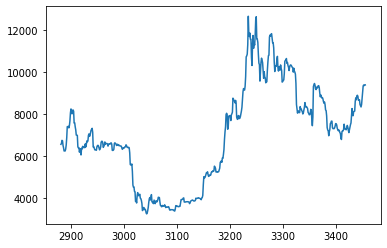

In [89]:
plt.plot(x_test['priceUSD_3month'])

In [90]:
estimator= SVR(kernel="linear")
selector = RFE(estimator)
selector = selector.fit(x_train.drop(['Date','After_3month','priceUSD_3month'],axis=1),x_train['priceUSD_3month'])
Features = selector.support_

In [91]:
y_test = x_test['priceUSD_3month']
x_test = x_test.drop(['Date','After_3month','priceUSD_3month'],axis=1)[x_test.drop(['Date','After_3month','priceUSD_3month'],axis=1).columns[Features]]

In [92]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train.drop(['Date','After_3month','priceUSD_3month'],axis=1)[x_train.drop(['Date','After_3month','priceUSD_3month'],axis=1).columns[Features]], x_train['priceUSD_3month'], test_size=0.16, random_state=42)

In [93]:
sp      = SelectPercentile(f_regression).fit(x_train, y_train)
x_train = pd.DataFrame(sp.transform(x_train))
x_cv = pd.DataFrame(sp.transform(x_cv))
x_test = pd.DataFrame(sp.transform(x_test))

In [94]:
features=x_train.columns
ss=MinMaxScaler((0,1)).fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train))
x_cv=pd.DataFrame(ss.transform(x_cv))
x_test=pd.DataFrame(ss.transform(x_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 37)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                570       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 710
Trainable params: 710
Non-trainable params: 0
_____________________________________________________________

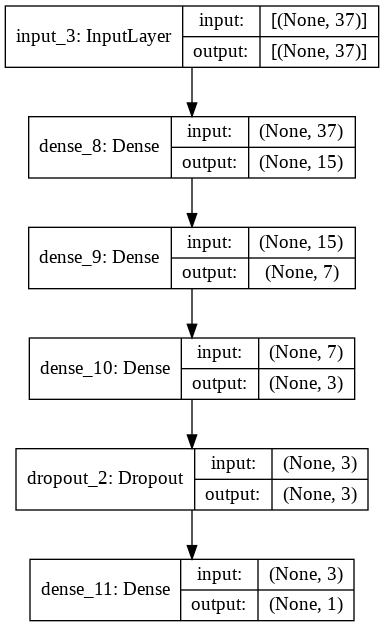

In [95]:
input_path1= Input(shape=(37))
dense1  =Dense(15,activation='relu',kernel_initializer='he_uniform')(input_path1)
dense2  =Dense(7,activation='relu',kernel_initializer='he_uniform')(dense1)
dense3  =Dense(3,activation='relu',kernel_initializer='he_uniform')(dense2)
dropout =Dropout(0.2)(dense3)
Output =Dense(1,activation='linear')(dropout)

model= Model(inputs=input_path1,outputs=Output)

model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [96]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='log_cosh',optimizer=opt,metrics=['mean_squared_error','mean_absolute_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [97]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=60,callbacks=[tensorboard_callback,cb])

Epoch 1/60
2420/2420 [==============================] - 4s 1ms/step - loss: 1311.8658 - mean_squared_error: 10109493.0000 - mean_absolute_error: 1312.5339 - val_loss: 1165.9930 - val_mean_squared_error: 8155818.0000 - val_mean_absolute_error: 1166.6754
Epoch 2/60
2420/2420 [==============================] - 3s 1ms/step - loss: 1310.1610 - mean_squared_error: 10104185.0000 - mean_absolute_error: 1310.8435 - val_loss: 1164.4972 - val_mean_squared_error: 8151272.5000 - val_mean_absolute_error: 1165.1670
Epoch 3/60
2420/2420 [==============================] - 4s 1ms/step - loss: 1308.7651 - mean_squared_error: 10099309.0000 - mean_absolute_error: 1309.4363 - val_loss: 1163.3419 - val_mean_squared_error: 8147189.5000 - val_mean_absolute_error: 1164.0132
Epoch 4/60
2420/2420 [==============================] - 3s 1ms/step - loss: 1307.6741 - mean_squared_error: 10094874.0000 - mean_absolute_error: 1308.3557 - val_loss: 1162.4645 - val_mean_squared_error: 8143583.0000 - val_mean_absolute_error

In [98]:
print(mean_squared_error(y_test, y_test_pred))

7186881.185582381


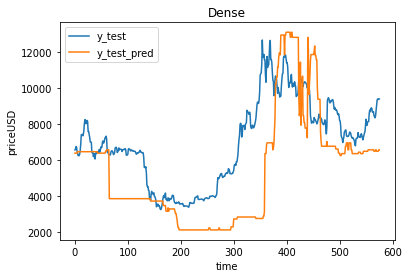

In [99]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title('Dense')
plt.show()

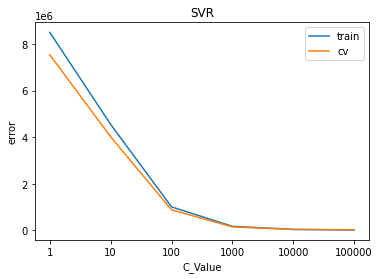

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000,100000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=i, epsilon=0.2))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('C_Value')
plt.xticks([0,1,2,3,4,5],[1,10,100,1000,10000,100000])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

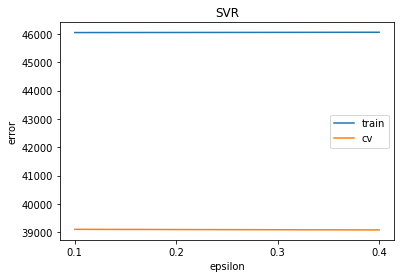

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(kernel='rbf',C=10000, epsilon=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('epsilon')
plt.xticks([0,1,2,3],[0.1,0.2,0.3,0.4])
plt.ylabel('error')
plt.title('SVR')
plt.legend()
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), SVR(C=10000))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

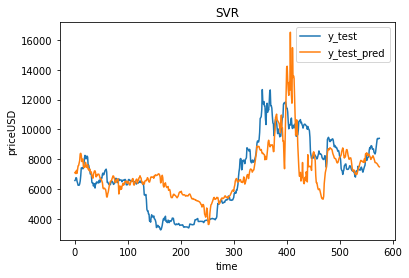

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("SVR")
plt.show()

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

2615914.6651803683


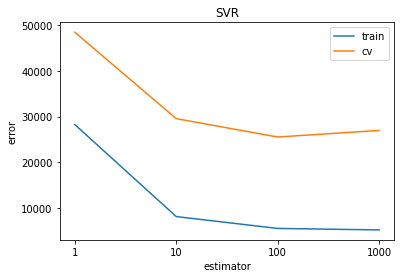

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=i))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimator')
plt.xticks([0,1,2,3],[1,10,100,1000])
plt.ylabel('error')
plt.title('randomforest')
plt.legend()
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), RandomForestRegressor(n_estimators=100))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

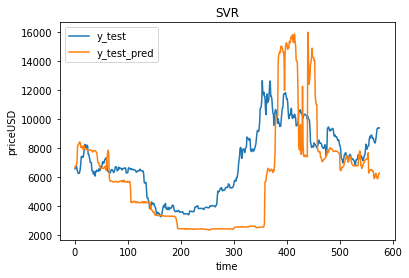

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("randomforest")
plt.show()

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

8280990.178137673


[12:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


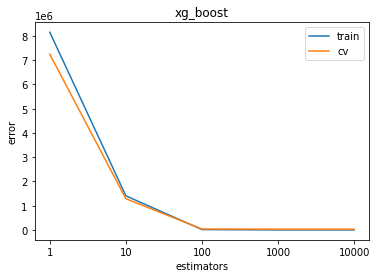

In [ ]:
train=[]
cv=[]
for i in [1,10,100,1000,10000]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('estimators')
plt.xticks([0,1,2,3,4],[1,10,100,1000,10000])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[12:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

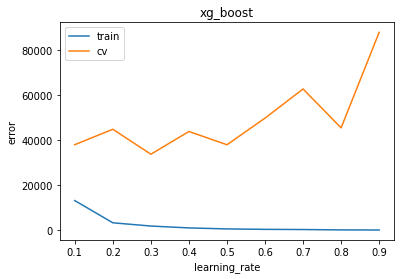

In [ ]:
train=[]
cv=[]
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('learning_rate')
plt.xticks([0,1,2,3,4,5,6,7,8],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

[12:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


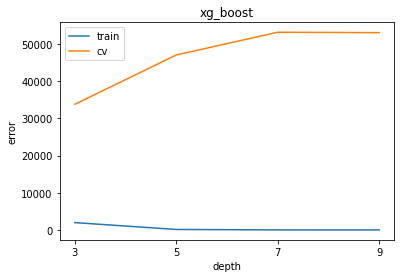

In [ ]:
train=[]
cv=[]
for i in [3,5,7,9]:
  regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.3,max_depth=i,n_jobs=-1))
  regr.fit(x_train,y_train)
  y_train_pred=regr.predict(x_train)
  train.append(mean_squared_error(y_train, y_train_pred))
  y_cv_pred=regr.predict(x_cv)
  cv.append(mean_squared_error(y_cv, y_cv_pred))
plt.plot(train,label='train')
plt.plot(cv,label='cv')
plt.xlabel('depth')
plt.xticks([0,1,2,3],[3,5,7,9])
plt.ylabel('error')
plt.title('xg_boost')
plt.legend()
plt.show()

In [ ]:
regr = make_pipeline(RobustScaler(),StandardScaler(), XGBRegressor(n_estimators=100,learning_rate=0.3,n_jobs=-1))
regr.fit(x_train,y_train)
y_test_pred=regr.predict(x_test)

[12:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


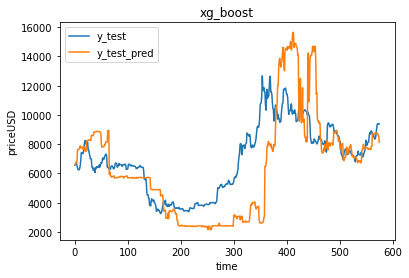

In [ ]:
sns.lineplot(x=np.arange(len(y_test)),y=y_test,label='y_test') 
sns.lineplot(x=np.arange(len(y_test)),y=y_test_pred,label='y_test_pred')
plt.ylabel('priceUSD')
plt.xlabel('time')
plt.title("xg_boost")
plt.show()

In [ ]:
print(mean_squared_error(y_test, y_test_pred))

6777467.139011044


In [ ]:
myTable = PrettyTable([ "Model", "RMSE", "MAPE"])
myTable.add_row(["SVR", "2615914.66", ""])
myTable.add_row(["randomforest", "8280990.17", ""])
myTable.add_row(["xg_boost", "6777467.13", ""])

In [ ]:
print(myTable)

+--------------+------------+------+
|    Model     |    RMSE    | MAPE |
+--------------+------------+------+
|     SVR      | 2615914.66 |      |
| randomforest | 8280990.17 |      |
|   xg_boost   | 6777467.13 |      |
+--------------+------------+------+
